<a href="https://colab.research.google.com/github/NattapongKong/vibrationDampingExp/blob/main/Copy_of_VibrationLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as smp
from math import *
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.metrics import r2_score
from scipy.misc import derivative
import warnings
warnings.filterwarnings('ignore')

mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
font = {'family' : 'TH Sarabun Chula',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font',  **font)


In [6]:
#เปิดไฟล์จาก URL
df = []
startAtRow = 13 #แถวที่เริ่ม Header ของ Log ข้อมูล ใน Csv จาก Logger (เริ่มนับจาก 0)
dataURL = ['https://raw.githubusercontent.com/NattapongKong/vibrationDampingExp/main/LabL35.0.csv','https://raw.githubusercontent.com/NattapongKong/vibrationDampingExp/main/LabL42.5.csv','https://raw.githubusercontent.com/NattapongKong/vibrationDampingExp/main/LabL46.5.csv']
try:
  for file in dataURL:
    df.append(pd.read_csv(file,skiprows=startAtRow))
  print('data loaded successfully')
except:
  raise Exception("Error while opening data,Maybe file cant be found")


data loaded successfully


In [44]:
startTime = [3.7,3.6,3.73] #เวลาที่กราฟเริ่มขยับของแต่ละข้อมูล (เล็งเอา)

L = np.array([0.465,0.425,0.350]) #m
m = 0.025
b = 0.0161
h = np.array([0.00145,0.00150,0.00150])
I = (1/12)*b*(h**3)



In [11]:
def x(t, A, lam, omega_d, phi):#ฟังค์ชั่น x(t)
  x_t =  A * np.exp(-lam * t) * np.sin(omega_d * t + phi)
  return x_t
def a(t, A, lam, omega_d, phi): #กำหนดฟังค์ชั้นความเร่ง
  a_t = derivative(x, t, dx=t[1]-t[0], args=(A, lam, omega_d, phi), order=5,n=2) #diff ฟังค์ชั่น x(t) 2 ครั้ง
  return a_t


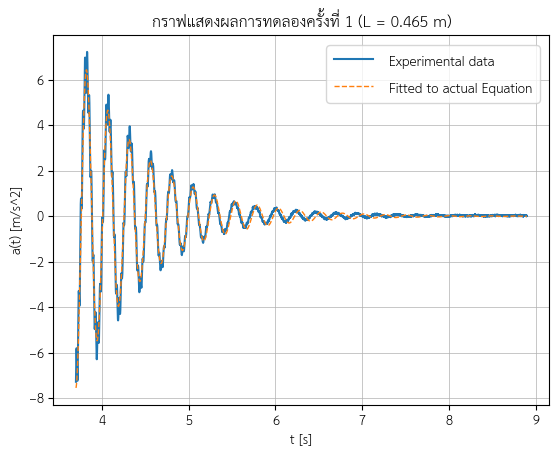

ข้อมูลที่ 1
ค่า Parameters ที่ถูกใช้ fit curve(A, lam, omega_d, phi): [ -1.47653658   1.31124377  25.53928735 -89.8851194 ]
R-squared value ระหว่าง Curve กับ ข้อมูลแลป: 0.9695147386063315



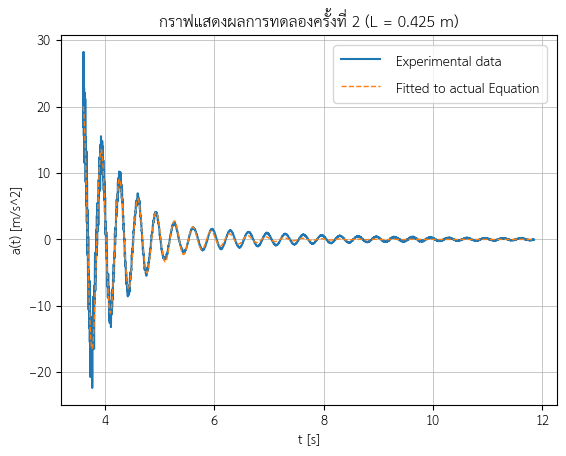

ข้อมูลที่ 2
ค่า Parameters ที่ถูกใช้ fit curve(A, lam, omega_d, phi): [  3.98550202   1.18166878  18.76742591 -62.97373284]
R-squared value ระหว่าง Curve กับ ข้อมูลแลป: 0.9501393965794022



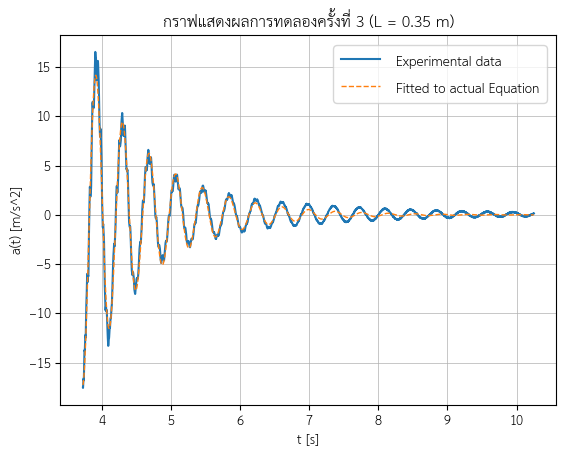

ข้อมูลที่ 3
ค่า Parameters ที่ถูกใช้ fit curve(A, lam, omega_d, phi): [ -3.42660551   1.06501282  16.34232105 -56.32985999]
R-squared value ระหว่าง Curve กับ ข้อมูลแลป: 0.9761345879198272



In [12]:
i = 0
#สร้าง Array ไว้เก็บค่าต่างๆของแต่ละชุดข้อมูล
tFilterArray = []
afilterArray = []
propArray = []
reportArray = pd.DataFrame({})

for data in df: #ลูปดูทุกชุดข้อมูล
  a_raw = data['m/s2'].values
  t = data['Unit'].values
  filter_condition = (t >= startTime[i])
  t_filtered = t[filter_condition]
  tFilterArray.append(t_filtered)
  a_filtered = a_raw[filter_condition]
  popt, pcov = curve_fit(a, t_filtered, a_filtered,  maxfev=10000) #ลบ Noise และทำ Curve fit กับฟังค์ชั่น a ตามทฤษฎีแล้วเก็บค่า parameter ไว้ใน popt
  propArray.append([*popt]) #บันทึกข้อมูล parameters ลง Array
  a_fit = a(t_filtered,*popt) #ชุดข้อมูลกราฟ Array ของค่า a
  r_squared = r2_score(a_filtered, a_fit) #คิดค่าการกระจาย R^2 ไว้เช็คดูว่าค่าที่ได้ตรงกับกราฟทฤษฎีเท่าไร

  #พล็อตกราฟ
  plt.plot(t_filtered, a_filtered, label='Experimental data')
  plt.plot(t_filtered, a_fit,linestyle='--',linewidth=1, label='Fitted to actual Equation')
  plt.grid(linestyle='-', linewidth=0.5)
  plt.legend()
  plt.xlabel("t [s]")
  plt.ylabel("a(t) [m/s^2]")
  plt.title("กราฟแสดงผลการทดลองครั้งที่ "+str(i+1)+' (L = '+str(L[i])+" m)")
  plt.show()

#========================================================================================
  print("ข้อมูลที่ " + str(i+1))
  print("ค่า Parameters ที่ถูกใช้ fit curve(A, lam, omega_d, phi):", popt)
  print("R-squared value ระหว่าง Curve กับ ข้อมูลแลป:", r_squared)
  print("")
  i = i+1

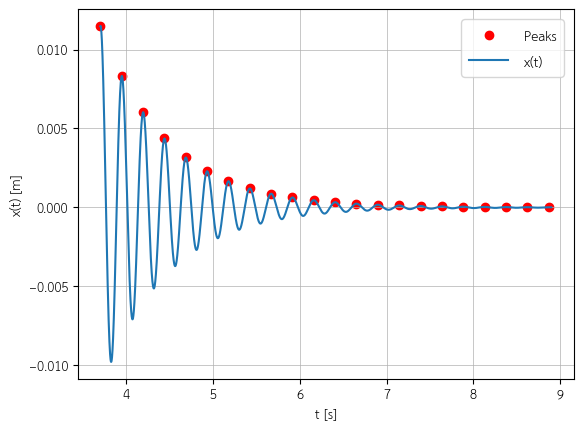

ข้อมูลชุดที่ 1
T = 0.24602380952380948
Damping = 0.05127468673932345


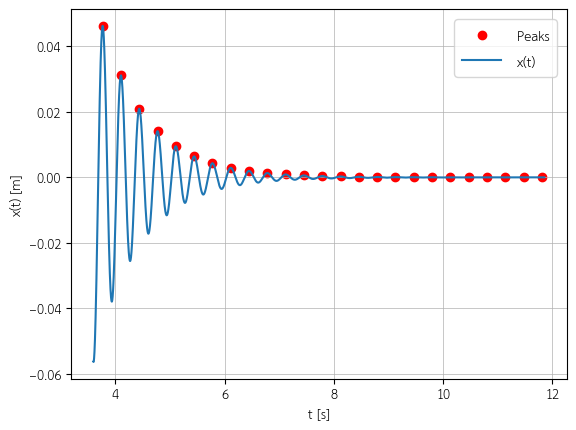

ข้อมูลชุดที่ 2
T = 0.33479166666666665
Damping = 0.0628393790937109


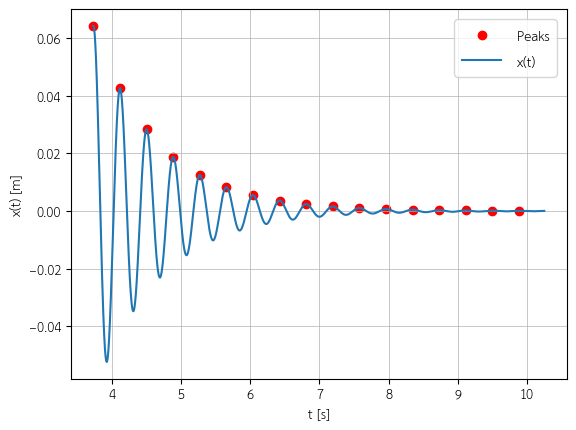

ข้อมูลชุดที่ 3
T = 0.38449999999999995
Damping = 0.06503104085624556


In [48]:
i = 0
dampArray = []
TArray = []
omega_nArray =[]
omega_dArray =[]
for tfilter in tFilterArray:
  x_fit = x(tfilter, *propArray[i])
  xPeaks, _ = find_peaks(x_fit, distance=300) #หาค่า peaks ของกราฟเพิ่อใช้หาค่า T
  xPeaks_filtered = xPeaks[xPeaks < len(tfilter)]
  T = np.mean(np.diff(tfilter[xPeaks_filtered])) #ค่า mean ของ T (ผลต่างของค่า peaks ในแต่ละ cycle)
  logDecrement = np.log(x(tfilter[xPeaks_filtered], *propArray[i]) / (x(tfilter[xPeaks_filtered] + T, *propArray[i])))
  meanLogDecrement = np.mean(logDecrement) #หาค่า mean ของ LogDecrement
  damping = meanLogDecrement/(sqrt((4*pi**2)+(meanLogDecrement**2))) #คิดค่า daping Ratio โดยใช้ mean ของ LogDecrement (Ideal ค่าคงที่ในทุกจุด)
  omega_d =  2*pi/T #เช็ค omega_d กับค่า parameter
  omega_n = omega_d/sqrt(1-damping**2)
  dampArray.append(damping)
  TArray.append(T)
  omega_nArray.append(omega_n)
  omega_dArray.append(omega_d)
  #พล็อตกราฟ
  plt.scatter(tfilter[xPeaks_filtered], x_fit[xPeaks_filtered], color='r', label='Peaks')
  plt.plot(tfilter,x(tfilter,*propArray[i]), label='x(t)')
  plt.grid(linestyle='-', linewidth=0.5)
  plt.legend()
  plt.xlabel("t [s]")
  plt.ylabel("x(t) [m]")

  plt.show()
  print('ข้อมูลชุดที่ '+str(i+1))
  print('T = '+ str(T))
  print('Damping = '+ str(damping))

  i=i+1
  # print('omega_n = '+ str(omega_d))
k = m*(np.array(omega_nArray)**2)
E = (k*L**3)/(3*I)


In [49]:
reportArray['L(m)'] = L
reportArray['T(s)'] = TArray
reportArray['omega_n(Rad/s)'] = omega_nArray
reportArray['omega_d(Rad/s)'] = omega_dArray
reportArray['Damping Ratio'] = dampArray
reportArray['K (N/m)'] = k
reportArray['E (N/m)'] = E
reportArray[['L(m)','T(s)','omega_d(Rad/s)','omega_n(Rad/s)','K (N/m)','E (N/m)','Damping Ratio']]


,L(m),T(s),omega_d(Rad/s),omega_n(Rad/s),K (N/m),E (N/m),Damping Ratio
0,0.465,0.246024,25.538932,25.572570,16.348909,1.339608e+11,0.051275
1,0.425,0.334792,18.767448,18.804613,8.840337,4.995695e+10,0.062839
2,0.350,0.384500,16.341184,16.375848,6.704210,2.115982e+10,0.065031


In [52]:
print('Damping Ratio เฉลี่ย:', str(np.mean(dampArray)))
print('Modulus เฉลี่ย:', str(np.mean(E)))

Damping Ratio เฉลี่ย: 0.0597150355630933
Modulus เฉลี่ย: 68359192732.49044
